In [120]:
import os
import pickle
import numpy as np
import itertools as it

from types import SimpleNamespace

import Modules.pauli as pauli
import Modules.Ham_MX2_11_band as H
import Modules.TB_parameters as TB
import Modules.plot_functions as pf
import Modules.functions as func

%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from kwant._colormaps import kwant_red

path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'

In [26]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'
out_name = 'Edge_DOS_kys_bias_mu18308eV_sqrts_Delta08meV'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    sqrts = pickle.load(fp)
    params = pickle.load(fp)
    orb_mag = pickle.load(fp)
    three_d = pickle.load(fp)
print(keys, orb_mag, three_d)

['0.001', '0.0015', '0.002', '0.0025'] False True


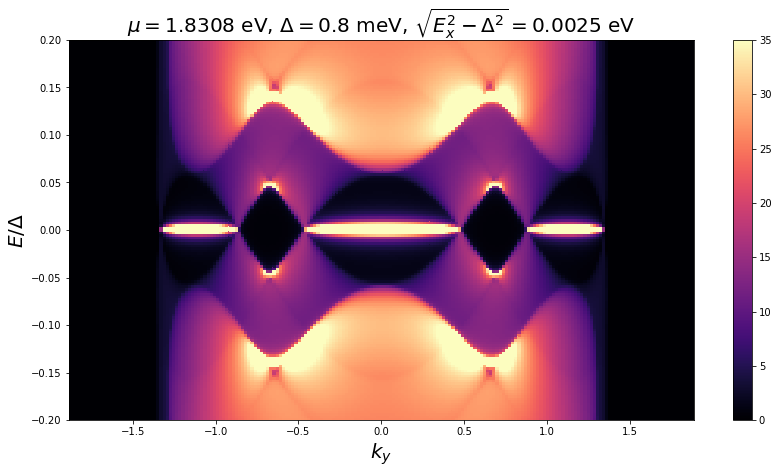

In [27]:
key = keys[3]
sqrt = key
pf.plot_color_data(d_dict[key], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+sqrt+' eV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=35)

In [21]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'
out_name = 'Edge_DOS_kys_bias_mu18308eV_sqrts_Delta08meV_orb'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    sqrts = pickle.load(fp)
    params = pickle.load(fp)
    orb_mag = pickle.load(fp)
    three_d = pickle.load(fp)
print(keys, orb_mag, three_d)

['0.001', '0.0015', '0.002', '0.0025'] True True


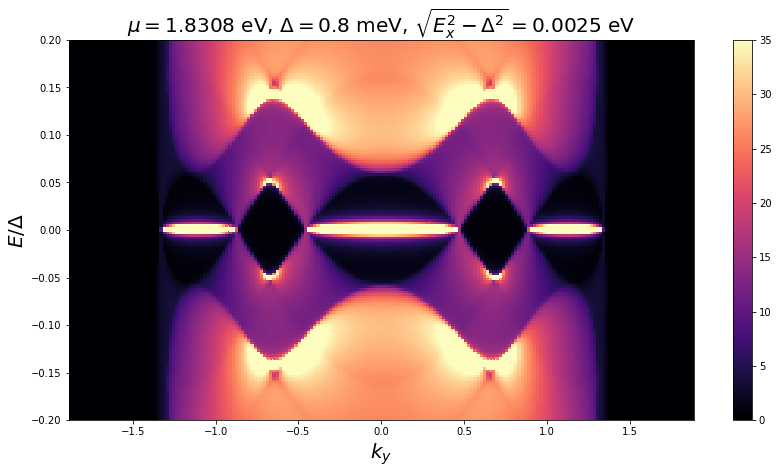

In [25]:
key = keys[3]
sqrt = key
pf.plot_color_data(d_dict[key], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+sqrt+' eV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=35)

In [57]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'
out_name = 'Edge_DOS_bias_line_cuts_ky0_mu18308eV_sqrt25meV_pots_orbs_Delta08meV'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    orb_mags = pickle.load(fp)
    pots = pickle.load(fp)
    params = pickle.load(fp)
    three_d = pickle.load(fp)

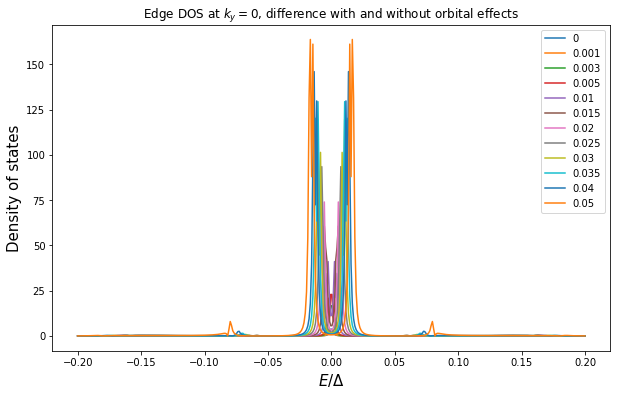

In [73]:
fig = plt.figure(figsize=(10, 6))
offs = 0
for i, key in enumerate(keys[::2]):
    pot, orb_mag = key
    key1 = keys[2*i+1]
    pot1, orb_mag1 = key1
    diff = np.abs(np.array(d_dict[key]) - np.array(d_dict[key1]))
    assert pot == pot1
    plt.plot(Es/params['Delta'], diff + i*offs, label=key[0])
plt.legend()
plt.title('Edge DOS at $k_y = 0$, difference with and without orbital effects')
plt.xlabel(r'$E/\Delta$', size=15)
plt.ylabel(r'Density of states', size=15)

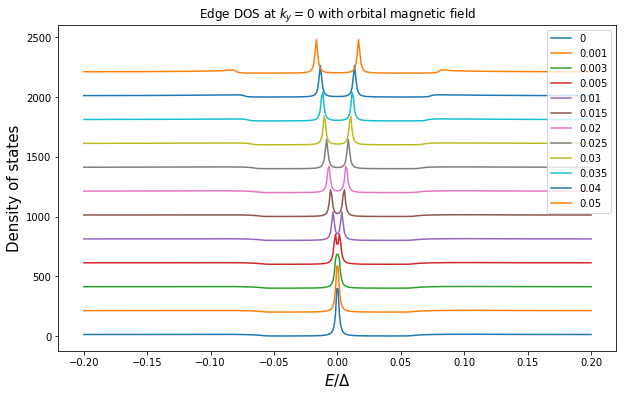

In [79]:
fig = plt.figure(figsize=(10, 6))
offs = 100
for i, (key, value) in enumerate(d_dict.items()):
    pot, orb_mag = key
    if orb_mag:
        plt.plot(Es/params['Delta'], np.array(value) + i*offs, label=key[0])
plt.legend()
plt.title('Edge DOS at $k_y = 0$ with orbital magnetic field')
plt.xlabel(r'$E/\Delta$', size=15)
plt.ylabel(r'Density of states', size=15)

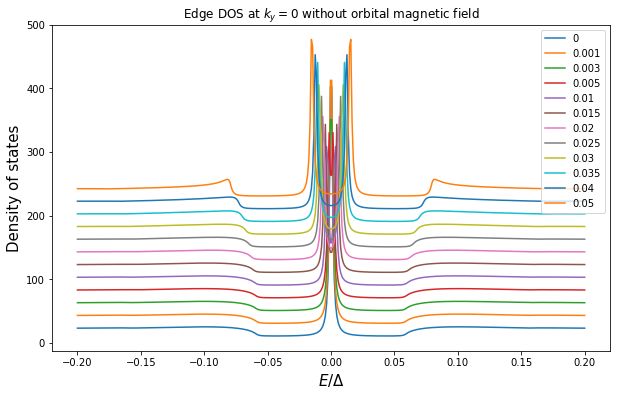

In [77]:
fig = plt.figure(figsize=(10, 6))
offs = 10
for i, (key, value) in enumerate(d_dict.items()):
    pot, orb_mag = key
    if not orb_mag:
        plt.plot(Es/params['Delta'], np.array(value) + i*offs, label=key[0])
plt.legend()
plt.title('Edge DOS at $k_y = 0$ without orbital magnetic field')
plt.xlabel(r'$E/\Delta$', size=15)
plt.ylabel(r'Density of states', size=15)

In [81]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'
out_name = 'Edge_DOS_kys_bias_mu18308eV_sqrt25meV_pots_orbs_Delta08meV'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    orb_mags = pickle.load(fp)
    pots = pickle.load(fp)
    params = pickle.load(fp)
    three_d = pickle.load(fp)
print(keys)

[(0.001, True), (0.001, False), (0.005, True), (0.005, False), (0.01, True), (0.01, False), (0.015, True), (0.015, False), (0.02, True), (0.02, False), (0.03, True), (0.03, False), (0.04, True), (0.04, False)]


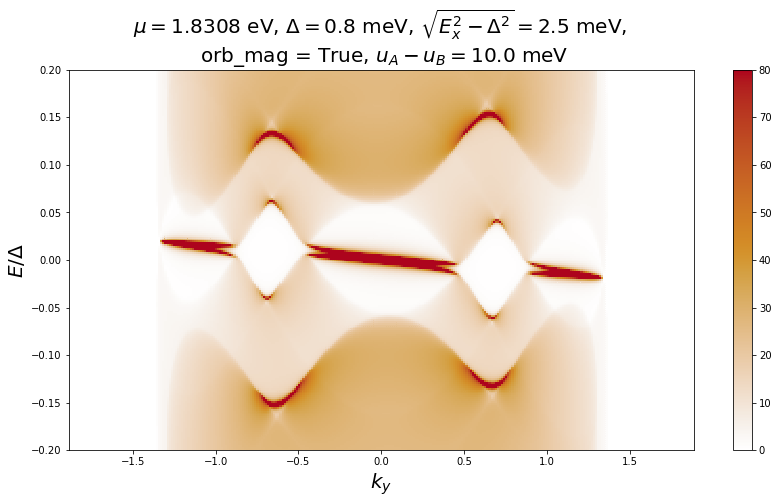

In [138]:
key = keys[2]
pf.plot_color_data(d_dict[key], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =2.5$ meV, \n orb_mag = '+str(key[1])+
                   ', $u_A-u_B = $'+str(np.round(1000*2*key[0]))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap=kwant_red, vmin=0.0, vmax=80)

['5e-06', '1e-06']


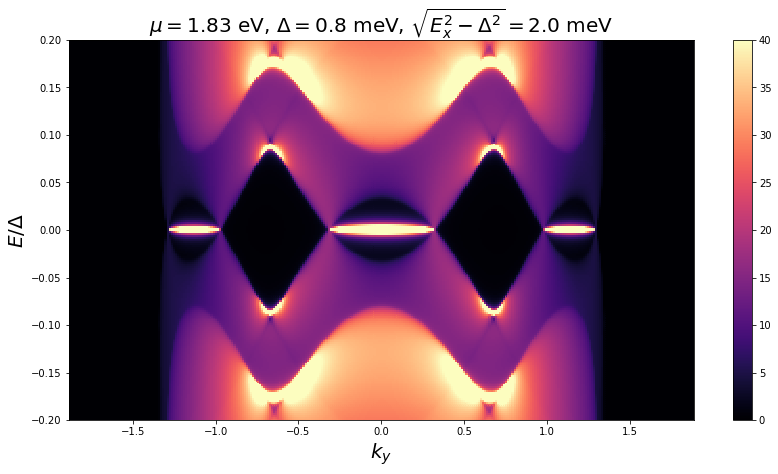

In [2]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt2meV_Delta08meV_broadenings'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[1]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)

['5e-06', '1e-06']


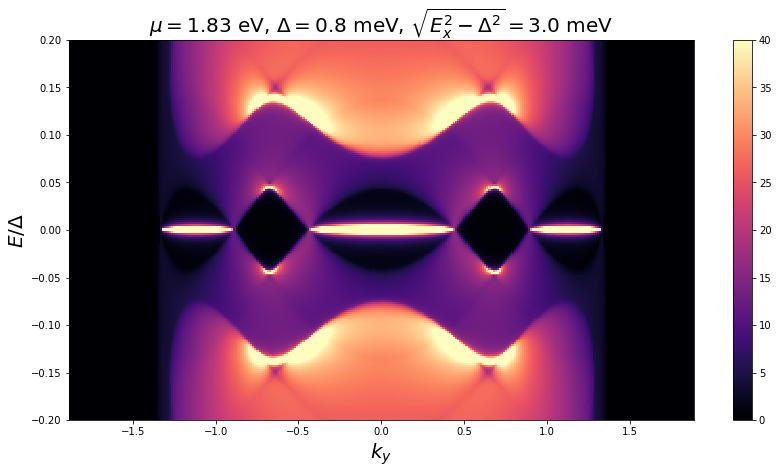

In [4]:
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt3meV_Delta08meV_broadenings'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[1]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

['5e-06', '1e-06']


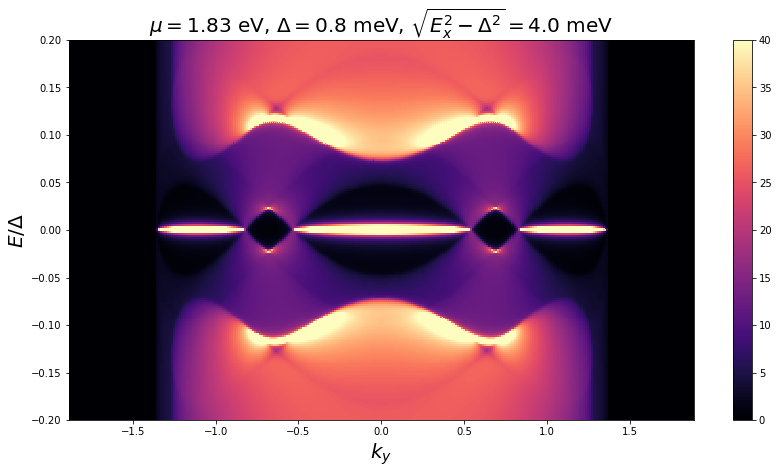

In [5]:
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt4meV_Delta08meV_broadenings'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[1]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

['5e-06', '1e-06']


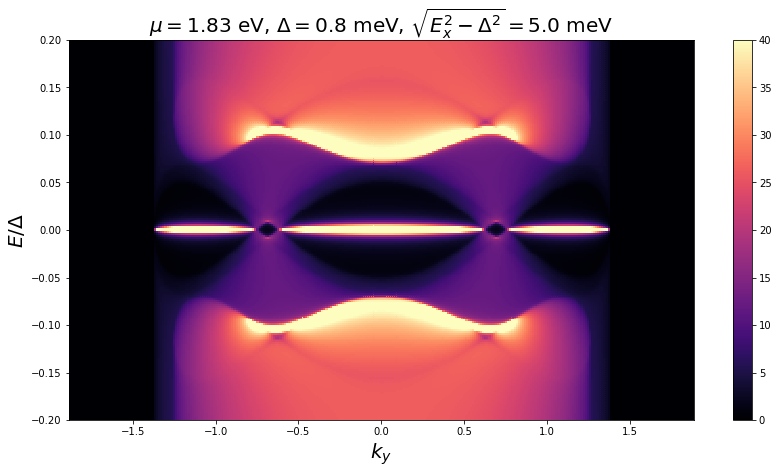

In [6]:
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt5meV_Delta08meV_broadenings'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[1]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

['5e-06', '1e-06']


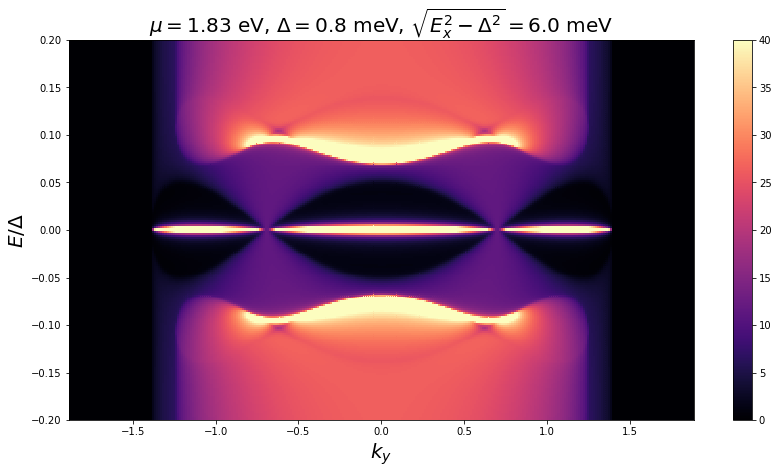

In [7]:
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt6meV_Delta08meV_broadenings'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[1]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

## Orbital field

['1e-06']


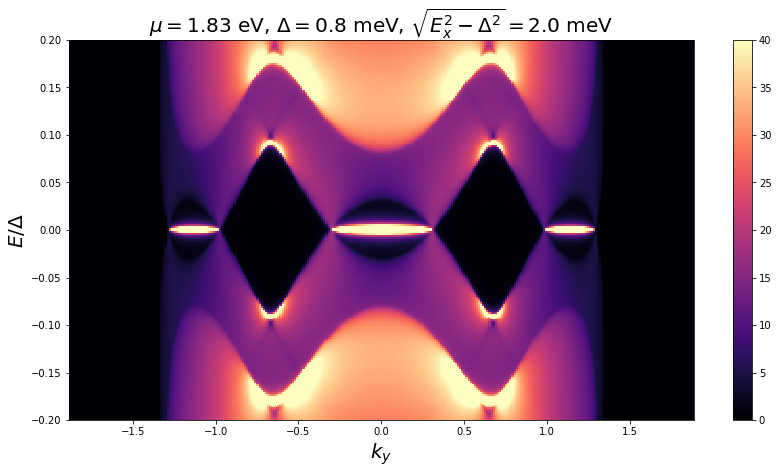

In [9]:
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt2meV_Delta08meV_orb'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[0]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

['1e-06']


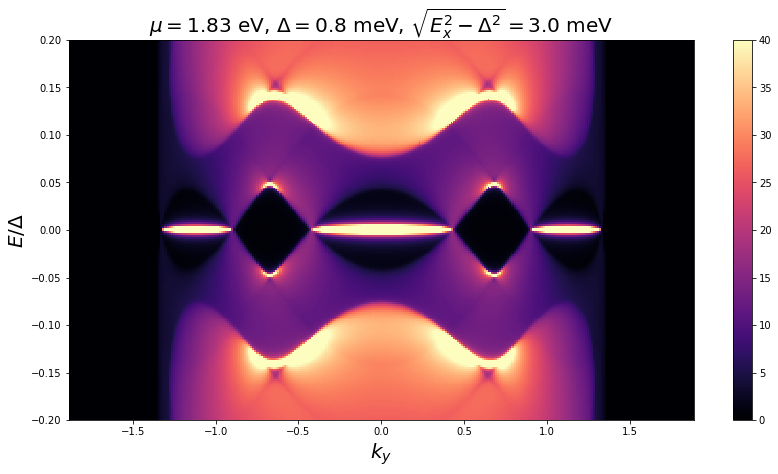

In [10]:
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt3meV_Delta08meV_orb'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[0]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

['1e-06']


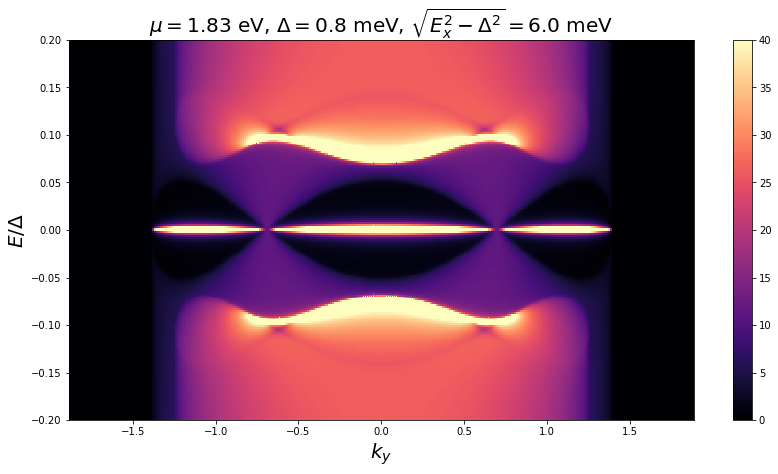

In [11]:
out_name = 'Edge_DOS_kys_bias_mu183eV_sqrt6meV_Delta08meV_orb'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[0]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

['1e-06']


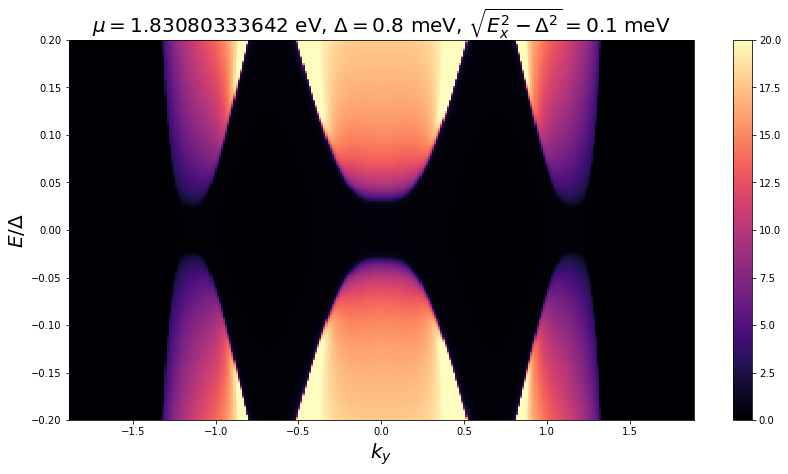

In [14]:
out_name = 'Edge_DOS_kys_bias_cross_mu_sqrt01meV_Delta08meV_orb'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[0]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=20)    

['1e-06']


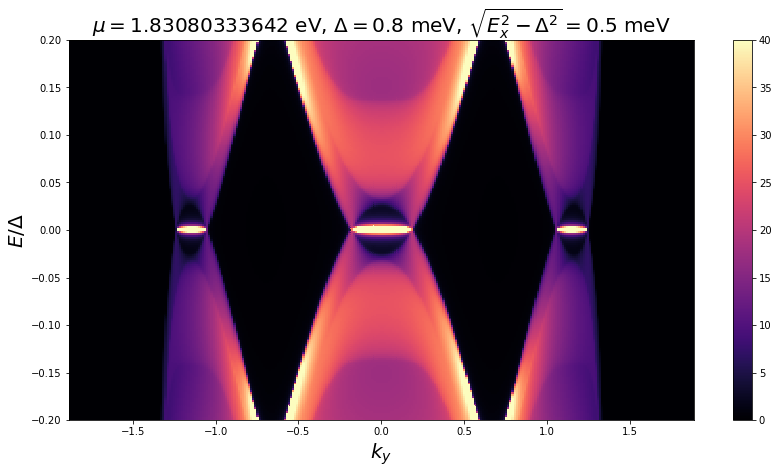

In [16]:
out_name = 'Edge_DOS_kys_bias_cross_mu_sqrt05meV_Delta08meV_orb'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[0]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    

['1e-06']


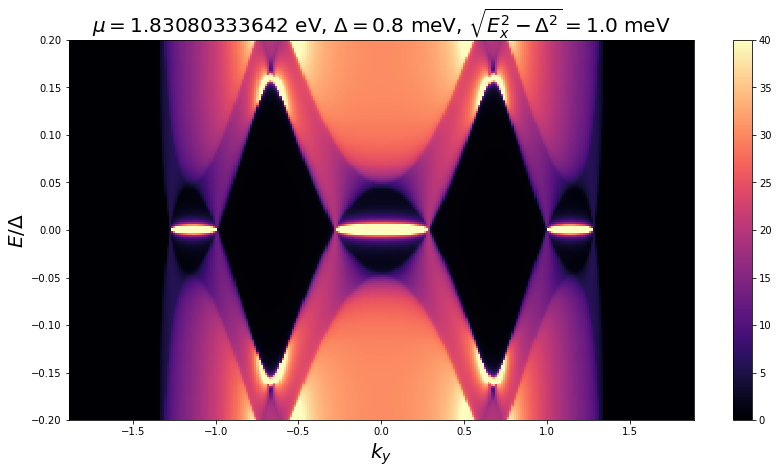

In [17]:
out_name = 'Edge_DOS_kys_bias_cross_mu_sqrt1meV_Delta08meV_orb'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    kys = pickle.load(fp)
    Es = pickle.load(fp)
    keys = pickle.load(fp)
    etas = pickle.load(fp)
    params = pickle.load(fp)
print(keys)
sqrt = 1000*np.sqrt(params['Ex']**2 - params['Delta']**2)
pf.plot_color_data(d_dict[keys[0]], kys, Es/params['Delta'], ylabel=r'$E/\Delta$',
                   title=r'$\mu = $'+str(params['mu'])+' eV, $\Delta =$'+str(1000*params['Delta'])+
                   ' meV, $\sqrt{E_x^2 - \Delta^2} =$'+str(np.round(sqrt, 2))+' meV',
                   norm=1.0, xlabel=r'$k_y$', pcolor=True, cmap='magma', vmin=0.0, vmax=40)    